In [29]:
import numpy as np #importar libreria matematica
import plotly.express as px #herramienta de plot
import plotly.graph_objects as go

# sistemas de referencia y cinemática

## coordenadas rectangulares

![title](E-rectP_12-4.png)
>  La leva circular de radio $R=16[mm]$ pivota alrededor de O y produce una excentricidad de $\frac{R}{2}$. Utilziando geometría se puede demostrar que la relación entre $x$, la posición coordenada del punto $A$, y el ángulo $\theta$ como $$x(\theta)=\frac{R}{2}\Bigg(cos(\theta)+\sqrt{cos^2(\theta)+3}\Bigg)$$<br>Si la leva rota horario alrededor de O con velocidad angular constante $\dot{\theta}=2000[rpm]$ Determinar la velocidad del seguidor. 

Derivando se tiene: $$v=-\frac{R}{2}sen(\theta)\Bigg(1+\frac{cos(\theta)}{\sqrt{cos^2(\theta)+3}}\Bigg)\dot{\theta}$$



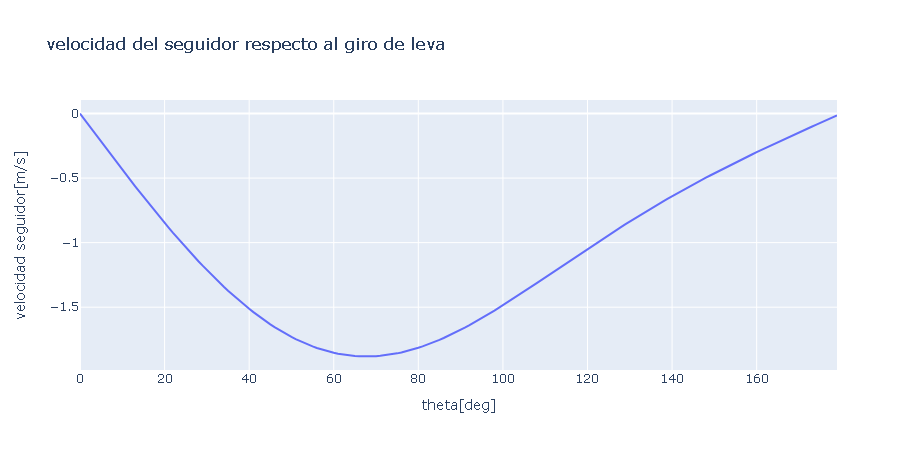

In [41]:
#datos
R = 16/1000 #[m]
O=2000*((2*np.pi)/60) #[rad/s]
#análisis
th=np.arange(0,180,1) #creando lista numérica
vth = np.array(np.deg2rad(th)) #transformado a una matriz
vs=-(R/2)*np.sin(vth)*(1+((np.cos(vth))/np.sqrt(((np.cos(vth))**2)+3)))*O
#plot
fig=px.line(x=th,y=vs,labels={'x':'theta[deg]','y':'velocidad seguidor[m/s]'},title="velocidad del seguidor respecto al giro de leva")
fig.show()

## coordendas normal tangencial
![title](E-rectP_13-2.png)
> El auto de carreras mostrado viaja a 90[km/h] cuando empieza la curva semicircular en A. El conductor incrementea su velocidad de manera uniforme hasta llegar a C a una velocidad de 144[km/h]. Cuál es la aceleración máxima del auto.
Dado que la rapidez aumenta de manera uniforme, la aceleración tangencial es la que se mantiene constante.<br> Integrando $a_{t}ds=vdv$ se obtiene $$\frac{v^2}{2}=a_{t}s+C$$<br>Evaluando para $$\begin{vmatrix} 
   A: s=0, v=25[m/s]  \\
   C:s=\pi R, v=40[m/s]  \\
      \end{vmatrix} $$
Luego, se tiene $$\frac{v^2}{2}=1.55*s+312.5$$
la aceleración normal, cambia respecto a la velocidad $$a_{n}=\frac{v^2}{R}$$


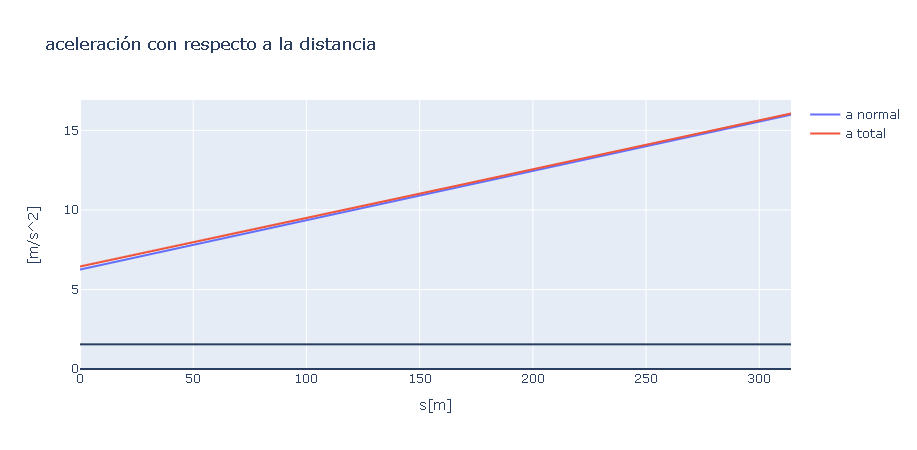

In [40]:
#datos
R=100 #[m]
s=np.arange(0,R*np.pi,1) #creando lista numérica
at=1.55 #[m/s^2]
#análisis 
vt=np.sqrt(2*(1.55*s+312.5)) #velocidad tangencial
an=(vt**2)/R
aa=np.sqrt((at**2)+(an**2))
#plot
fig=go.Figure()

fig.add_trace(go.Scatter(x=s, y=an, 
                         mode='lines', 
                         name='a normal'))
fig.add_trace(go.Scatter(x=s, y=aa, 
                         mode='lines', 
                         name='a total'))
fig.add_hline(y=at)
fig.add_hline(y=0)

fig.update_layout(title='aceleración con respecto a la distancia recorrida',
                   xaxis_title='s[m]',
                   yaxis_title='[m/s^2]')
fig.show()

## coordenadas polares (radial transversal)

![title](E-rectM_2-141.png)

> La posición radial de la partícula de fluido P en una bomba centrífuga con álabe radiales es aproximadamente $r=r_{0}cos(h)Kt$ donde $t$ es tiempo y $K=\dot{\theta}$ es la variación constante angular a la cual gira la bomba. <br> Cuando la bomba gira a 1200[rpm], la distancia recorrida es de 10[cm] y el cilindro de alimentación tiene un radio de 2[cm]. Cuál es la variación d ela velocidad de la partícula de fluido mientras se encuentra en la bomba. 

Por lo que se tiene para las fuerzas en el eje transversal $$\Sigma F e_{\theta}=2*\dot{r}\dot{\theta}*m = N$$
<br>Y en el eje radial se tiene $$\Sigma F e_{r}=0=\ddot{r}-\dot{r}*\dot{\theta}^2$$

La velocidad de la partícula que se encuentra en el eje radial $$v_r=\dot{r}=r_{0}sinh(K)$$

La velocidad de la partícula en el eje transversal $$v_{\theta}=r*\dot{\theta}$$

Y las aceleraciones $$\vec{a}=corriolis+euler+centripeta+radial=2*\dot{r}*\dot{\theta}\vec{e_{\theta}}+r*\ddot{r}\vec{e_{\theta}}-r*\dot{\theta}^2\vec{e_{r}}+\ddot{r}\vec{e_{r}}$$

**La partícula es impulsada por la fuerza normal del álabe de la bomba.**

**La fuerza de expulsión (generada) es debido a la aceleración centrípeta.**

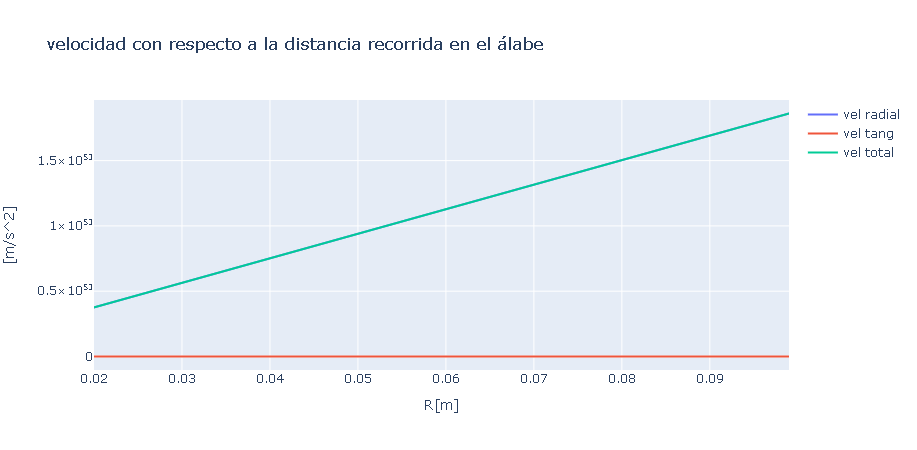

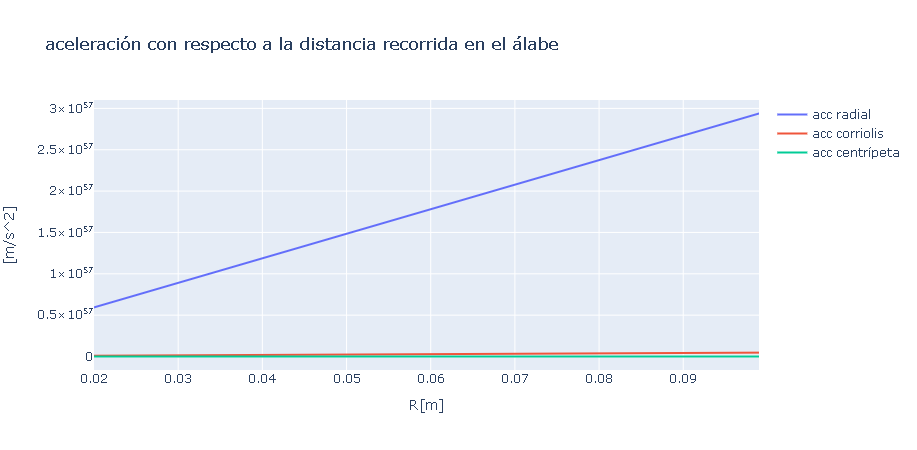

In [58]:
#datos
r0=2/100 #[m]
rf=10/100 #[m]
d=rf-r0 #[m] distancia alabe
O=1200*(2*np.pi/60)#[rad/s]

#análisis
R=np.arange(r0,rf,0.001) #lista numérica - radio
vr=R*np.sinh(O) #velocidad radial [m/s]
vt=R*O
vv=np.sqrt(vr**2+vt**2)
ar=vr*O**2 #ac radial
acr=2*vr*O
act=R*(O**2)

#plot velocidades
fig=go.Figure()

fig.add_trace(go.Scatter(x=R, y=vr, 
                         mode='lines', 
                         name='vel radial'))
fig.add_trace(go.Scatter(x=R, y=vt, 
                         mode='lines', 
                         name='vel tang'))
fig.add_trace(go.Scatter(x=R, y=vv, 
                         mode='lines', 
                         name='vel total'))

fig.update_layout(title='velocidad con respecto a la distancia recorrida en el álabe',
                   xaxis_title='R[m]',
                   yaxis_title='[m/s^2]')
fig.show()
#plot aceleraciones
fig=go.Figure()

fig.add_trace(go.Scatter(x=R, y=ar, 
                         mode='lines', 
                         name='acc radial'))
fig.add_trace(go.Scatter(x=R, y=acr, 
                         mode='lines', 
                         name='acc corriolis'))
fig.add_trace(go.Scatter(x=R, y=act, 
                         mode='lines', 
                         name='acc centrípeta'))

fig.update_layout(title='aceleración con respecto a la distancia recorrida en el álabe',
                   xaxis_title='R[m]',
                   yaxis_title='[m/s^2]')
fig.show()